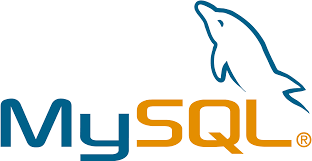

In [2]:
# MySQL Data Engineering Tutorial using Jupyter Notebook

from IPython.display import Image
Image(filename='./img/mysql.png', width=500)

# 目次
データストレージの紹介

MySQLへの接続

データベースとのやり取り

テーブルの作成

データの挿入

LOAD DATAを使った効率的なデータ読み込み

まとめ

# データストレージの紹介
データストレージは、あらゆるデータシステムにおいて重要な部分です。データエンジニアとして、データがどのように保存され、取得され、変換されるかを理解することは基本的なスキルです。

MySQLは、生産システムで広く使われている人気のあるオープンソースのリレーショナルデータベースです。このチュートリアルでは、以下の内容を扱います：

MySQLへの接続

テーブルの作成

データの挿入と読み込み

基本的なクエリの実行

mysql-connector-pythonライブラリを使用します。

%pip install mysql-connector-python

## Connecting to MySQL

We use `mysql.connector.connect()` to establish a connection with a running MySQL server.

```python
import mysql.connector

conn = mysql.connector.connect(
    host="localhost",       # or remote host
    user="your_username",
    password="your_password",
    database="your_database"
)
cursor = conn.cursor()
print("Connected successfully")
```

## Interacting with the Database

```python
cursor.execute("SELECT DATABASE();")
result = cursor.fetchone()
print("You're connected to database:", result)
```

## Creating Tables

```python
create_table_query = """
CREATE TABLE IF NOT EXISTS users (
    id INT PRIMARY KEY,
    email VARCHAR(255),
    name VARCHAR(100),
    address TEXT
);
"""
cursor.execute(create_table_query)
print("Table created.")
```

## Inserting Data (from CSV)

We can use Python's `csv` module to insert data row by row.

```python
import csv

with open('user_accounts_new.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)  # Skip header
    for row in reader:
        cursor.execute("INSERT INTO users (id, email, name, address) VALUES (%s, %s, %s, %s)", row)

conn.commit()
print("Data inserted row by row.")
```

## Efficient Data Loading (using LOAD DATA)

The most efficient way to load data into MySQL is using `LOAD DATA INFILE`. This requires MySQL server to have file access.

```python
# Ensure file path is accessible to MySQL Server
load_data_query = """
LOAD DATA INFILE '/path/to/user_accounts_new.csv'
INTO TABLE users
FIELDS TERMINATED BY ','
ENCLOSED BY '"'
LINES TERMINATED BY '\n'
IGNORE 1 ROWS;
"""
cursor.execute(load_data_query)
conn.commit()
print("Data loaded using LOAD DATA INFILE.")
```

## Querying Data

```python
cursor.execute("SELECT * FROM users LIMIT 3;")
rows = cursor.fetchall()
for idx, row in enumerate(rows):
    print(f"Row {idx+1}: {row}")
```

# まとめ
mysql-connector-pythonを使ってMySQLデータベースに接続しました

関連するカラムを持つusersテーブルを作成しました

CSVファイルからデータを挿入しました

効率的な大量読み込みのためにLOAD DATA INFILEを使用しました

挿入したデータに対してクエリを実行しました

MySQLは、構造化されたデータセットや大規模なETLパイプラインにおいて、データエンジニアリングに非常に強力なツールです。